In [2]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

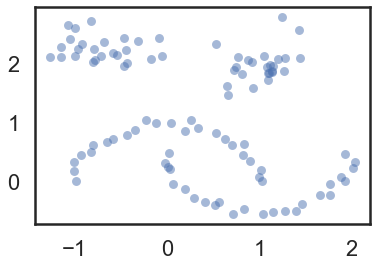

In [3]:
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)

In [20]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True, prediction_data=True)
clusterer.fit(test_data)

HDBSCAN(gen_min_span_tree=True, prediction_data=True)

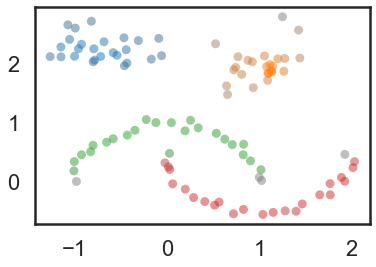

In [6]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat) 
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in 
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

<AxesSubplot:>

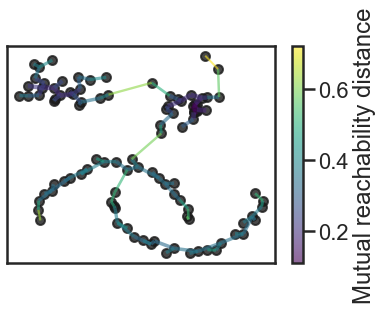

In [7]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=80, 
                                      edge_linewidth=2)

In [9]:
clusterer.cluster_persistence_

array([0.25621478, 0.4280875 , 0.07689001, 0.09078116])

<AxesSubplot:ylabel='distance'>

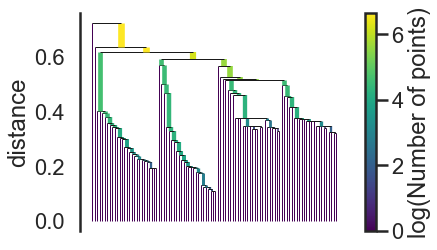

In [10]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

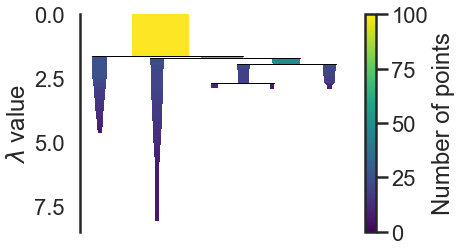

In [12]:
clusterer.condensed_tree_.plot()

In [16]:
print(len(clusterer.probabilities_))
print(len(test_data))

100
100


In [19]:
clusterer.prediction_data_

In [27]:
#test_points = np.array(df_new)
new_point = np.array(test_data[:2])

In [29]:
hdbscan.approximate_predict(clusterer, new_point)

(array([2, 2]), array([1., 1.]))

In [28]:
new_point

array([[0.70601556, 0.62905187],
       [0.90244576, 0.35547539]])

In [33]:
clusterer.labels_

array([ 2,  2,  2,  3,  2,  3,  2,  2,  3,  3,  3,  2,  3,  3,  2,  3,  3,
        2,  3,  2, -1,  2,  2,  2,  2,  2,  3, -1,  3,  3,  3,  2,  3,  2,
        3,  2,  3,  3,  2,  2,  3,  3,  2,  3, -1,  3, -1,  2,  2,  3,  1,
        0,  0,  1,  0,  0,  0,  1,  1,  1,  1,  1,  0,  0,  0,  0,  1,  0,
        0,  0,  1,  0,  1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  0,  0,  1,
        0,  1,  0,  1,  1,  0,  0,  1,  1,  0,  1,  0,  0,  0, -1])